In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### MRSA Data Cleaning (DONE)

In [3]:
# mrsa_2013_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2013.csv')
# mrsa_2014_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2014.csv')
# mrsa_2015_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2015.csv')

In [4]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2016.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2016_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2016.csv', encoding=result['encoding'])

In [5]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2017.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2017_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2017.csv', encoding=result['encoding'])

In [6]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2018.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2018_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2018.csv', encoding=result['encoding'])

In [7]:
# mrsa_2013 = mrsa_2013_raw[['Year ','State','HAI','Facility_Name1','Facility_Name2','Facility_Name3',
#                        'FACID1','FACID2','FACID3','County','Infection_Count','Patient_Days']].dropna()
# mrsa_2013 = mrsa_2013.rename(columns={'Facility_Name1':'Facility1','Facility_Name2':'Facility2','Facility_Name3':'Facility3',
#                          'FACID1':'Facility1_ID','FACID2':'Facility2_ID','FACID3':'Facility3_ID',
#                          'Patient_Days':'Num_patients'})

In [8]:
# mrsa_2014 = mrsa_2014_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Cases','Patient_Days',
#                           'Predicted_Cases']].dropna()
# mrsa_2014 = mrsa_2014.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID','Cases':'Infection_Count',
#                                       'Patient_Days':'Num_patients','Predicted_Cases':'Predicted_Infections'})

In [9]:
# mrsa_2015 = mrsa_2015_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Hospital_Onset_Cases',
#                            'Patient_Days']].dropna()
# mrsa_2015 = mrsa_2015.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID',
#                                       'Hospital_Onset_Cases':'Infection_Count','Patient_Days':'Num_patients',})

In [10]:
# mrsa_2016 = mrsa_2016_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2016 = mrsa_2016.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [11]:
# mrsa_2017 = mrsa_2017_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2017 = mrsa_2017.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [12]:
# mrsa_2018 = mrsa_2018_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2018 = mrsa_2018.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [13]:
# mrsa_2013.to_csv('mrsa cleaned data/mrsa_2013.csv',index=False)
# mrsa_2014.to_csv('mrsa cleaned data/mrsa_2014.csv',index=False)
# mrsa_2015.to_csv('mrsa cleaned data/mrsa_2015.csv',index=False)
# mrsa_2016.to_csv('mrsa cleaned data/mrsa_2016.csv',index=False)
# mrsa_2017.to_csv('mrsa cleaned data/mrsa_2017.csv',index=False)
# mrsa_2018.to_csv('mrsa cleaned data/mrsa_2018.csv',index=False)

### EDA

In [14]:
#load in mrsa data

mrsa_2013 = pd.read_csv('mrsa cleaned data/mrsa_2013.csv')
mrsa_2014 = pd.read_csv('mrsa cleaned data/mrsa_2014.csv')
mrsa_2015 = pd.read_csv('mrsa cleaned data/mrsa_2015.csv')
mrsa_2016 = pd.read_csv('mrsa cleaned data/mrsa_2016.csv')
mrsa_2017 = pd.read_csv('mrsa cleaned data/mrsa_2017.csv')
mrsa_2018 = pd.read_csv('mrsa cleaned data/mrsa_2018.csv')

In [15]:
mrsa_2013.head()

,Year,State,HAI,Facility1,Facility2,Facility3,Facility1_ID,Facility2_ID,Facility3_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Hanford",Adventist Medical Center-Selma,.,40000122,630012960,.,Kings-Fresno,2.0,42875.0
1,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Reedley",.,.,40000124,.,.,Fresno,0.0,5970.0
2,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"AHMC Anaheim Regional Medical Center, Anaheim",.,.,60000002,.,.,Orange,3.0,51929.0
3,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Alameda County Medical Center, Oakland","Alameda County Medical Center-Fairmont Campus,...",.,140000034,140000184,.,Alameda,7.0,55590.0
4,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,Alameda Hospital,.,.,140000011,.,.,Alameda,0.0,11520.0


(array([214.,  72.,  37.,  15.,   7.,   2.,   1.,   1.,   3.,   2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

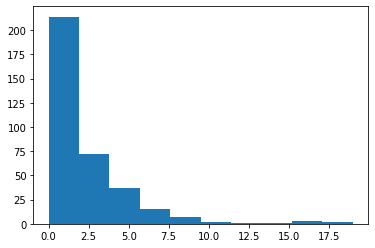

In [16]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

(array([297.,  41.,   8.,   6.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

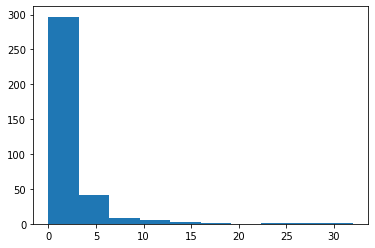

In [17]:
plt.hist(mrsa_2014['Infection_Count'])

(array([258.,  52.,  34.,   6.,   5.,   0.,   3.,   1.,   0.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

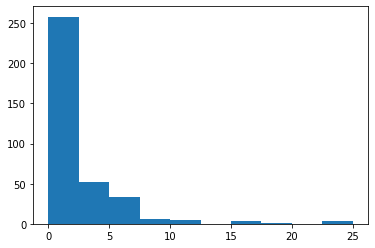

In [18]:
plt.hist(mrsa_2015['Infection_Count'])

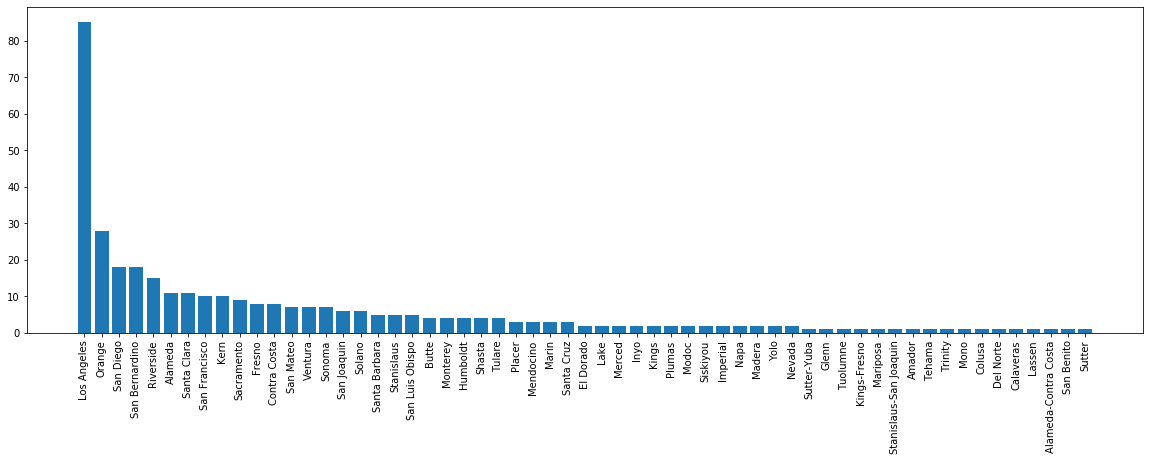

In [19]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

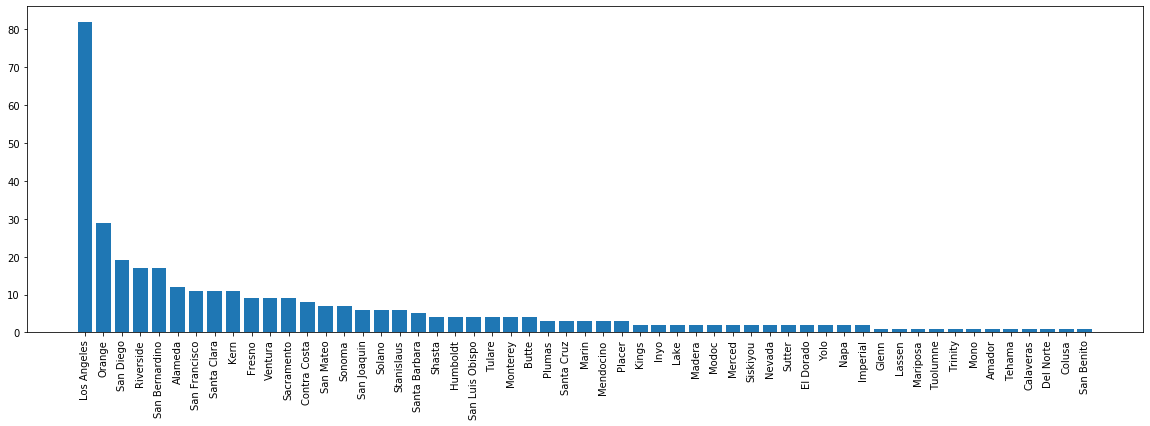

In [20]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

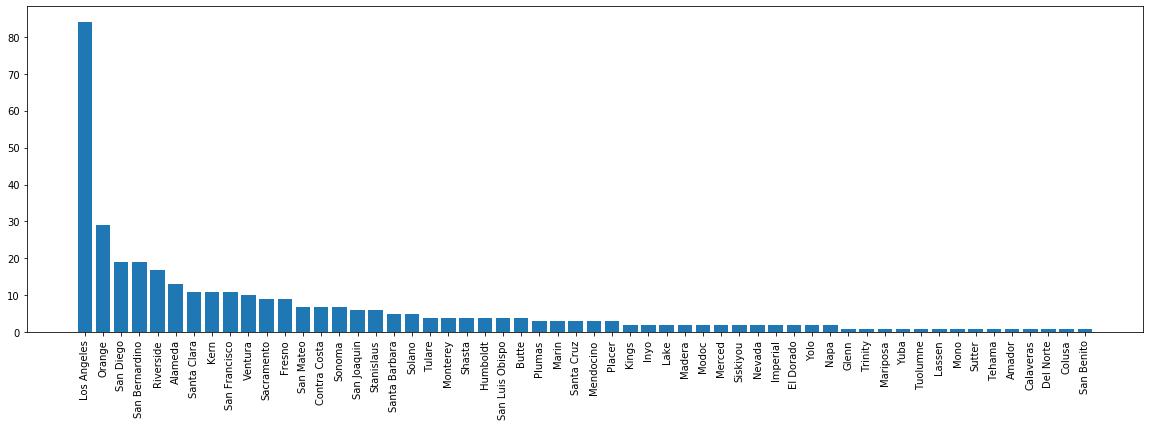

In [21]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [22]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

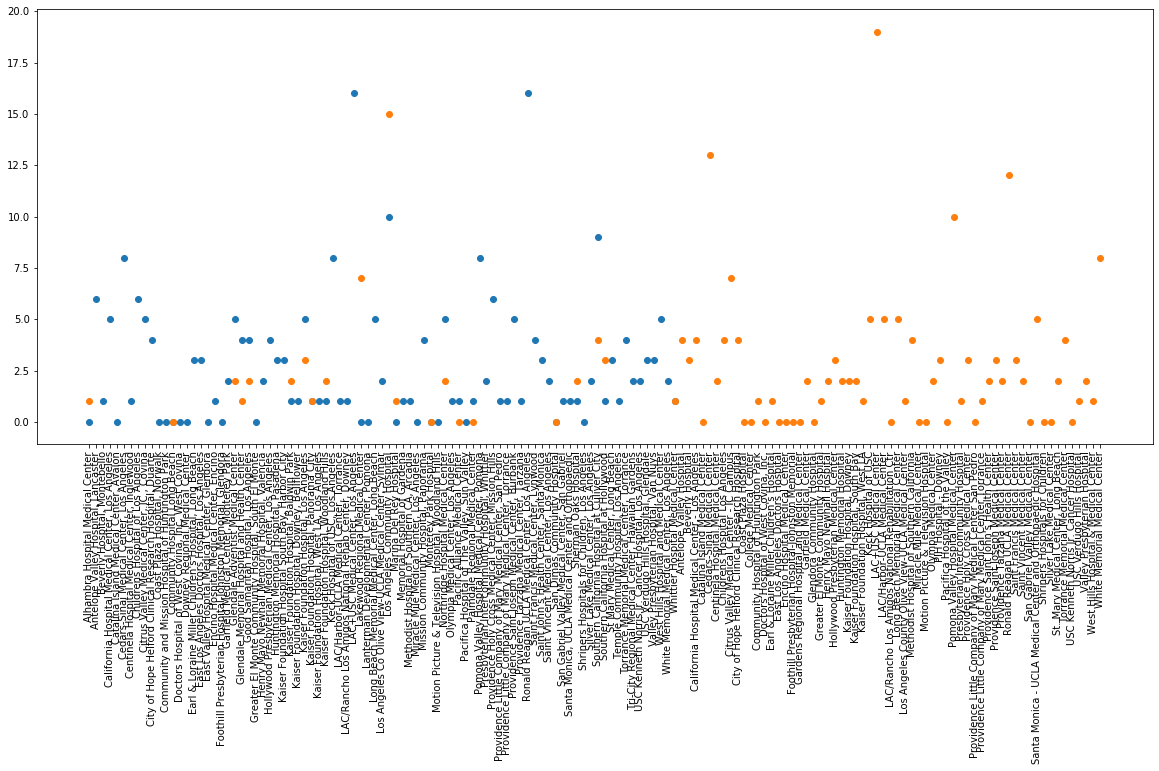

In [23]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

hospitals = la_2013['Facility1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(la_2014['Facility1'], la_2014['Infection_Count'])

plt.xticks(rotation=90);

In [24]:
la_2013.columns

Index(['Year ', 'State', 'HAI', 'Facility1', 'Facility2', 'Facility3',
       'Facility1_ID', 'Facility2_ID', 'Facility3_ID', 'County',
       'Infection_Count', 'Num_patients'],
      dtype='object')

In [25]:
len(la_2014['Facility1'].unique()) == len(la_2013['Facility1'].unique())

False

In [26]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

[{'b', 'c'}]

In [27]:
len(la_2013['Facility1']), len(la_2014['Facility1']), len(la_2015['Facility1']) # not the same hospitals

(85, 82, 84)

In [28]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

#[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

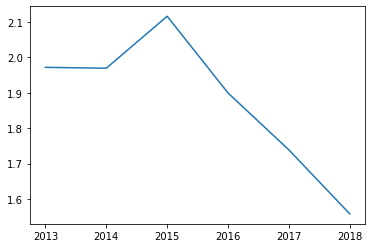

In [29]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Infection_Count']),
                np.mean(mrsa_2015['Infection_Count']),
                np.mean(mrsa_2016['Infection_Count']),
                np.mean(mrsa_2017['Infection_Count']),
                np.mean(mrsa_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #one possible version of 5B 

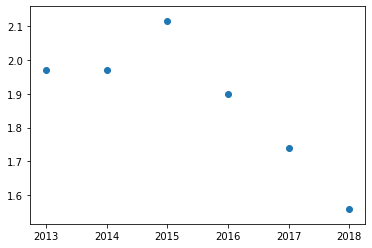

In [30]:
plt.scatter(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #another version of 5B 

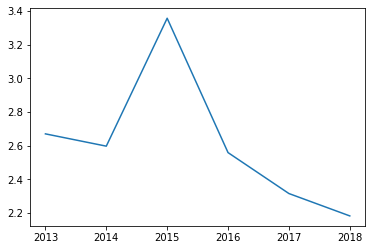

In [31]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']
la_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Los Angeles']
la_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Los Angeles']
la_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Los Angeles']



avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                   np.mean(la_2014['Infection_Count']), 
                   np.mean(la_2015['Infection_Count']), 
                   np.mean(la_2016['Infection_Count']),
                   np.mean(la_2017['Infection_Count']), 
                   np.mean(la_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_la)

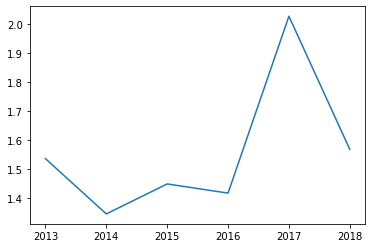

In [32]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']
orange_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Orange']
orange_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Orange']
orange_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Orange']



avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                   np.mean(orange_2014['Infection_Count']), 
                   np.mean(orange_2015['Infection_Count']), 
                   np.mean(orange_2016['Infection_Count']),
                   np.mean(orange_2017['Infection_Count']), 
                   np.mean(orange_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_orange)

### Population Data Cleaning (DONE)

In [33]:
# # population versus infection

# census_raw = pd.read_csv('cc-est2018-alldata-06.csv')
# census = census_raw[['CTYNAME','YEAR','TOT_POP']]
# # @Elias: is it ok to only keep these 3 columns? other columns won't be used necessarily


In [34]:
# # keep only relevant years
# census = census[census['YEAR'].isin([6,7,8,9,10,11])]

# # rename year numbers to actual years
# year_dict = {6:2013,7:2014,8:2015,9:2016,10:2017,11:2018}
# census['YEAR'] = census['YEAR'].replace(year_dict)

# census.to_csv('census_cleaned.csv',index=False)

# Pop Data EDA

In [35]:
census = pd.read_csv('census_cleaned.csv')
census.head()

,CTYNAME,YEAR,TOT_POP
0,Alameda County,2013,1580247
1,Alameda County,2013,97356
2,Alameda County,2013,98218
3,Alameda County,2013,92259
4,Alameda County,2013,95483


In [77]:
pop_by_county = census.groupby(['YEAR','CTYNAME']).agg(sum)
pop_by_county.head()

TOT_POP
YEAR CTYNAME                  
2013 Alameda County    3160494
     Alpine County        2254
     Amador County       73250
     Butte County       443328
     Calaveras County    89320

In [78]:
pop_by_county = pop_by_county.reset_index()
pop_by_county['County'] = pop_by_county['CTYNAME'].apply(lambda county_name:re.sub(r' County',"",county_name))
pop_by_county.head()

,YEAR,CTYNAME,TOT_POP,County
0,2013,Alameda County,3160494,Alameda
1,2013,Alpine County,2254,Alpine
2,2013,Amador County,73250,Amador
3,2013,Butte County,443328,Butte
4,2013,Calaveras County,89320,Calaveras


In [92]:
infec_2013 = list(mrsa_2013.groupby(['County']).agg(sum)['Infection_Count'])
infec_2014 = list(mrsa_2014.groupby(['County']).agg(sum)['Infection_Count'])
infec_2015 = list(mrsa_2015.groupby(['County']).agg(sum)['Infection_Count'])
infec_2016 = list(mrsa_2016.groupby(['County']).agg(sum)['Infection_Count'])
infec_2017 = list(mrsa_2017.groupby(['County']).agg(sum)['Infection_Count'])
infec_2018 = list(mrsa_2018.groupby(['County']).agg(sum)['Infection_Count'])

In [99]:
## population versus infection rate for each county
    ##  not all years have the same number of counties, so we cannot put all infection counts into one dataframe

infec_by_county_2013 = mrsa_2013.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2014 = mrsa_2014.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2015 = mrsa_2015.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2016 = mrsa_2016.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2017 = mrsa_2017.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2018 = mrsa_2018.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()

In [102]:
merge_2013 = pd.merge(infec_by_county_2013, pop_by_county.loc[pop_by_county['YEAR'] == 2013], 
         how='left',on='County').dropna()
merge_2014 = pd.merge(infec_by_county_2014, pop_by_county.loc[pop_by_county['YEAR'] == 2014], 
         how='left',on='County').dropna()
merge_2015 = pd.merge(infec_by_county_2015, pop_by_county.loc[pop_by_county['YEAR'] == 2015], 
         how='left',on='County').dropna()
merge_2016 = pd.merge(infec_by_county_2016, pop_by_county.loc[pop_by_county['YEAR'] == 2016], 
         how='left',on='County').dropna()
merge_2017 = pd.merge(infec_by_county_2017, pop_by_county.loc[pop_by_county['YEAR'] == 2017], 
         how='left',on='County').dropna()
merge_2018 = pd.merge(infec_by_county_2018, pop_by_county.loc[pop_by_county['YEAR'] == 2018], 
         how='left',on='County').dropna()

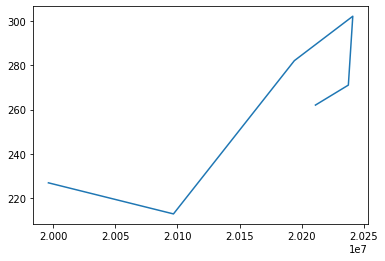

In [126]:
## line plot of total pop vs infection count in la county -- pop v inf in all years
## idea is to produce a similar plot with regression line for every county over all years 
    # (not all years have the same counties)
    

la_inf = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Infection_Count'].values[0]])
la_pop = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['TOT_POP'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['TOT_POP'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['TOT_POP'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['TOT_POP'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['TOT_POP'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['TOT_POP'].values[0]])
plt.plot(la_pop,la_inf)